In [3]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

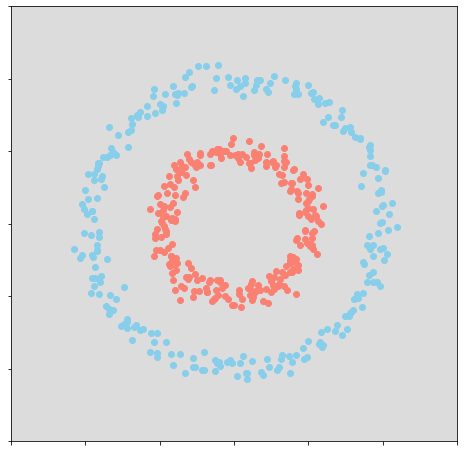

In [37]:
# Data 1

from sklearn.datasets import make_circles

X, Y = make_circles(n_samples= 500, factor= 0.5, noise= 0.05)

res = 100

_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)
_pY = np.zeros((res, res)) + 0.5

plt.figure(figsize= (8, 8))
plt.pcolormesh(_x0, _x1, _pY, cmap = 'coolwarm', vmin= 0, vmax= 1)

plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c= 'skyblue')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c= 'salmon')

plt.tick_params(labelbottom= False, labelleft= False)

In [12]:
# Forma 1

from matplotlib import animation
from IPython.core.display import display, HTML

# Usando tensorflow 1.X
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


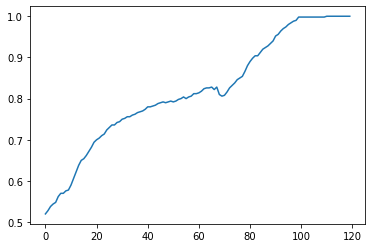

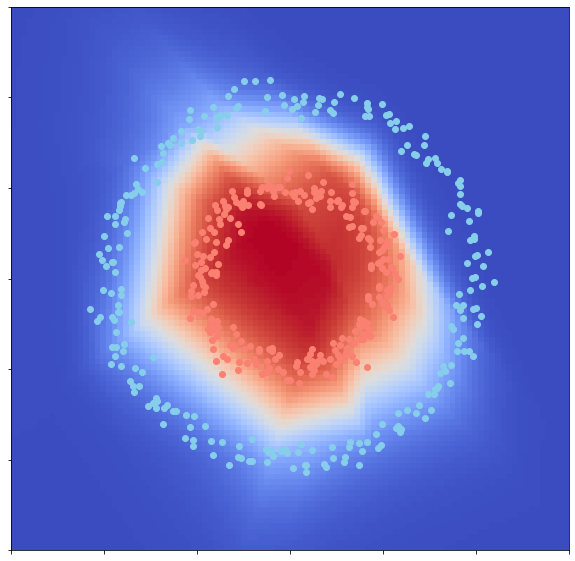

In [38]:
# Creando los puntos de entrada de datos del grafo

iX = tf.placeholder('float', shape= [None, X.shape[1]])
iY = tf.placeholder('float', shape= [None])

nn = [2, 18, 6, 1]
lr = 0.01

#Capa 1
W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name= 'Weights_1')
b1 = tf.Variable(tf.random_normal([nn[1]]), name= 'bias_1')

l1 = tf.nn.relu(tf.add(tf.matmul(iX, W1), b1))

#Capa 2
W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name= 'Weights_2')
b2 = tf.Variable(tf.random_normal([nn[2]]), name= 'bias_2')

l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))

#Capa 3
W3 = tf.Variable(tf.random_normal([nn[2], nn[3]]), name= 'Weights_3')
b3 = tf.Variable(tf.random_normal([nn[3]]), name= 'bias_3')

pY = tf.nn.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:, 0]

#Evaluacion
loss = tf.losses.mean_squared_error(pY, iY)

#Optimizador

optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(loss)

n_steps = 3000

lossA = []
iPY = []
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    for step in range(n_steps):
        
        _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict= { iX: X, iY: Y}) #Devuelve el optimizador, resultado de la función de coste
        
        if step % 25 == 0:
            
            acc = np.mean(np.round(_pY) == Y)
            
            lossA.append(acc)
            
            #print('Step', step, '/', n_steps, '- Loss = ', _loss, '- Acc =', acc)
            
            #Predicciones
            _pY = sess.run(pY, feed_dict= {iX : _pX}).reshape((res, res))
            
            iPY.append(_pY)
          
plt.plot(range(len(lossA)), lossA)
plt.show()
        
#Animación

ims = []

fig = plt.figure(figsize= (10, 10))

print('\n')

for fr in range(len(iPY)):
    
    im = plt.pcolormesh(_x0, _x1, iPY[fr], cmap='coolwarm', animated=True)
    
    plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c= 'skyblue')
    plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c= 'salmon')
    
    plt.tick_params(labelbottom= False, labelleft= False)
    
    ims.append([im])
    
an = animation.ArtistAnimation(fig, ims, interval= 50, blit= True, repeat_delay= 1000)

HTML(an.to_html5_video())

In [40]:
#Forma 2

import tensorflow.keras as kr

lr = 0.01
nn  = [2, 16, 8, 1]

model = kr.Sequential()

#Dense = fully conected

model.add(kr.layers.Dense(nn[1], activation='relu')) # Neuronas y función de activacion
model.add(kr.layers.Dense(nn[2], activation='relu')) 
model.add(kr.layers.Dense(nn[3], activation='sigmoid')) 

#Compilamos el modelo
model.compile(loss= 'mse', optimizer=kr.optimizers.SGD(lr= lr), metrics=['acc'])

model.fit(X, Y, epochs=250)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 500 samples
Epoch 1/250
500/500 [==============================] - 6s 12ms/sample - loss: 0.2814 - acc: 0.5000
Epoch 2/250
500/500 [==============================] - 0s 249us/sample - loss: 0.2800 - acc: 0.5000
Epoch 3/250
500/500 [==============================] - 0s 229us/sample - loss: 0.2787 - acc: 0.5000
Epoch 4/250
500/500 [==============================] - 0s 217us/sample - loss: 0.2774 - acc: 0.5000
Epoch 5/250
500/500 [==============================] - 0s 315us/sample - loss: 0.2763 - acc: 0.5000
Epoch 6/250
500/500 [==============================] - 0s 220us/sample - loss: 0.2752 - acc: 0.4980
Epoch 7/250
500/500 [==============================] - 0s 255us/sample - loss: 0.2742 - acc: 0.4840
Epoch 8/250
500/500 [==============================] - 0s 238us/sample - loss: 0.2733 - acc: 0.4760
Epoch 9/250
500/500 [==============================] - 0s 225us/sample - loss: 0.2724 - acc: 0.4560

500/500 [==============================] - 0s 958us/sample - loss: 0.2417 - acc: 0.5280
Epoch 78/250
500/500 [==============================] - 0s 535us/sample - loss: 0.2413 - acc: 0.5280
Epoch 79/250
500/500 [==============================] - 0s 700us/sample - loss: 0.2409 - acc: 0.5300
Epoch 80/250
500/500 [==============================] - 0s 639us/sample - loss: 0.2405 - acc: 0.5300
Epoch 81/250
500/500 [==============================] - 0s 658us/sample - loss: 0.2401 - acc: 0.5340
Epoch 82/250
500/500 [==============================] - 0s 367us/sample - loss: 0.2397 - acc: 0.5320s - loss: 0.2422 - acc: 0.47
Epoch 83/250
500/500 [==============================] - 0s 337us/sample - loss: 0.2393 - acc: 0.5340
Epoch 84/250
500/500 [==============================] - 0s 265us/sample - loss: 0.2390 - acc: 0.5360
Epoch 85/250
500/500 [==============================] - 0s 104us/sample - loss: 0.2387 - acc: 0.5360
Epoch 86/250
500/500 [==============================] - 0s 102us/sample - lo

500/500 [==============================] - 0s 136us/sample - loss: 0.2141 - acc: 0.8680
Epoch 158/250
500/500 [==============================] - 0s 138us/sample - loss: 0.2137 - acc: 0.8720
Epoch 159/250
500/500 [==============================] - 0s 128us/sample - loss: 0.2133 - acc: 0.8720
Epoch 160/250
500/500 [==============================] - 0s 129us/sample - loss: 0.2130 - acc: 0.8720
Epoch 161/250
500/500 [==============================] - 0s 130us/sample - loss: 0.2126 - acc: 0.8720
Epoch 162/250
500/500 [==============================] - 0s 124us/sample - loss: 0.2122 - acc: 0.8720
Epoch 163/250
500/500 [==============================] - 0s 131us/sample - loss: 0.2118 - acc: 0.8760
Epoch 164/250
500/500 [==============================] - 0s 134us/sample - loss: 0.2114 - acc: 0.8780
Epoch 165/250
500/500 [==============================] - 0s 136us/sample - loss: 0.2110 - acc: 0.8780
Epoch 166/250
500/500 [==============================] - 0s 132us/sample - loss: 0.2107 - acc: 0

500/500 [==============================] - 0s 98us/sample - loss: 0.1758 - acc: 0.9180
Epoch 238/250
500/500 [==============================] - 0s 98us/sample - loss: 0.1752 - acc: 0.9180
Epoch 239/250
500/500 [==============================] - 0s 94us/sample - loss: 0.1746 - acc: 0.9180
Epoch 240/250
500/500 [==============================] - 0s 94us/sample - loss: 0.1740 - acc: 0.9200
Epoch 241/250
500/500 [==============================] - 0s 96us/sample - loss: 0.1733 - acc: 0.9200
Epoch 242/250
500/500 [==============================] - 0s 112us/sample - loss: 0.1727 - acc: 0.9200
Epoch 243/250
500/500 [==============================] - 0s 136us/sample - loss: 0.1721 - acc: 0.9200
Epoch 244/250
500/500 [==============================] - 0s 172us/sample - loss: 0.1714 - acc: 0.9220
Epoch 245/250
500/500 [==============================] - 0s 126us/sample - loss: 0.1708 - acc: 0.9240
Epoch 246/250
500/500 [==============================] - 0s 176us/sample - loss: 0.1701 - acc: 0.9260

In [44]:
#Forma 3

import sklearn as sk
import sklearn.neural_network

lr = 0.02 # learning rate
nn = [2, 16, 8, 1]

#solver = optimizador
model = sk.neural_network.MLPRegressor(solver='sgd',
                                       learning_rate_init= lr,
                                       hidden_layer_sizes= nn[1:],
                                       verbose= True,
                                       n_iter_no_change= 1000) #multilayer perceptron, usando regressor para seguir obteniendo probabilidad a una de las clases

model.fit(X, Y)

Iteration 1, loss = 0.30472068
Iteration 2, loss = 0.18048656
Iteration 3, loss = 0.11779263
Iteration 4, loss = 0.13464228
Iteration 5, loss = 0.13746528
Iteration 6, loss = 0.11913341
Iteration 7, loss = 0.11046223
Iteration 8, loss = 0.10778547
Iteration 9, loss = 0.10611095
Iteration 10, loss = 0.10353068
Iteration 11, loss = 0.10130568
Iteration 12, loss = 0.10048218
Iteration 13, loss = 0.09925815
Iteration 14, loss = 0.09761068
Iteration 15, loss = 0.09584043
Iteration 16, loss = 0.09383052
Iteration 17, loss = 0.09185740
Iteration 18, loss = 0.08992019
Iteration 19, loss = 0.08760045
Iteration 20, loss = 0.08532829
Iteration 21, loss = 0.08295153
Iteration 22, loss = 0.08022803
Iteration 23, loss = 0.07758307
Iteration 24, loss = 0.07444035
Iteration 25, loss = 0.07132635
Iteration 26, loss = 0.06809044
Iteration 27, loss = 0.06475363
Iteration 28, loss = 0.06114079
Iteration 29, loss = 0.05742654
Iteration 30, loss = 0.05369176
Iteration 31, loss = 0.05004731
Iteration 32, los

C:\University\anaconda3\envs\gpu\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=[16, 8, 1], learning_rate='constant',
             learning_rate_init=0.02, max_fun=15000, max_iter=200, momentum=0.9,
             n_iter_no_change=1000, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='sgd', tol=0.0001,
             validation_fraction=0.1, verbose=True, warm_start=False)